In [3]:
import pandas as pd
import numpy as np
import dill
import time
import twint
import nest_asyncio

%matplotlib inline
nest_asyncio.apply()

## grab the tweets

In [4]:
c = twint.Config()

c.Search = '#チェリまほ'
c.Since = '2020-11-06'

c.Hide_output = True
c.Store_json = True
c.Output = 'tweets.json'

twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [5]:
df = pd.read_json('tweets.json',lines = True)
df.shape

(179477, 36)

In [10]:
df_short = df[df['date']>pd.to_datetime('2020-10-01')]
df_short.shape

(178825, 36)

In [13]:
df_short.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [40]:
df_short.drop_duplicates(subset=['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet','language','replies_count', 'retweets_count', 'likes_count'],inplace=True)

C:\Users\zzhu1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Actors related information

In [32]:
c = twint.Config()

c.Search = '#赤楚衛二'

c.Since = '2020-11-06'
#c.Until = '2017-01-01'
c.Hide_output = True
c.Store_json = True
c.Output = 'tweets_a.json'
twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [33]:
c = twint.Config()

c.Search = '#町田啓太'

c.Since = '2020-11-06'
#c.Until = '2017-01-01'
c.Hide_output = True
c.Store_json = True
c.Output = 'tweets_k.json'
twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [34]:
df_a= pd.read_json('tweets_a.json' , lines = True)
df_a.shape

(7013, 36)

In [35]:
df_k= pd.read_json('tweets_k.json' , lines = True)
df_k.shape

(10503, 36)

In [47]:
df_a.drop_duplicates(subset=['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet','language','replies_count', 'retweets_count', 'likes_count'],inplace=True)

df_k.drop_duplicates(subset=['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet','language','replies_count', 'retweets_count', 'likes_count'],inplace=True)

In [49]:
values_a = df_a['date'].value_counts().rename_axis('dates').reset_index(name='counts')
values_k = df_k['date'].value_counts().rename_axis('dates').reset_index(name='counts')

values = values_k.merge(values_a,on='dates',how='outer')
values.rename(columns={"counts_x": "Keita Machida","counts_y":"Eiji Akaso"},inplace=True)

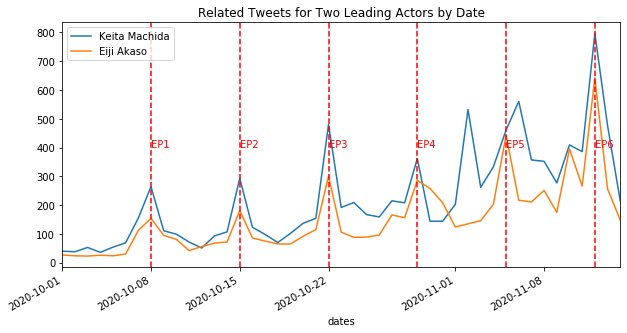

In [50]:
ax = values.plot(x='dates', y=["Keita Machida", "Eiji Akaso"],figsize = (10,5),title='Related Tweets for Two Leading Actors by Date')

for i in range(len(eps_dates)):
    ax.axvline(eps_dates[i], color='r', linestyle='--')
    ax.text(eps_dates[i],400,'EP{}'.format(i+1),color='red')

ax.figure.savefig('actors_eps6.png')

## All tweets combine

In [61]:
keywords = ['#CherryMagic','#CherryMaho','#30歳まで童貞だと魔法使いになれるらしい']

for key in keywords:
    c = twint.Config()
    c.Search = key
    c.Since = '2020-10-01'
    c.Hide_output = True
    c.Store_json = True
    c.Output = 'other_tweets.json'
    twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [62]:
others = pd.read_json('other_tweets.json',lines=True)

In [63]:
others.shape

(32239, 36)

In [64]:
df_short.shape

(129550, 36)

In [65]:
total_tweets = pd.concat([df_short,df_k,df_a,others])
total_tweets.shape

(178788, 36)

In [66]:
#delete duplicate tweets

total_tweets.drop_duplicates(subset=['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet','language','replies_count', 'retweets_count', 'likes_count'],inplace=True)

In [67]:
total_tweets.shape

(151200, 36)

## Tweets by Date

In [68]:
import datetime

start_date = pd.to_datetime('2020-10-01')
end_date = pd.to_datetime('2020-11-12')

eps_dates = []

while start_date < end_date:
    eps_date = start_date+datetime.timedelta(days=7)
    eps_dates.append(eps_date)
    start_date = eps_date

eps_dates

[Timestamp('2020-10-08 00:00:00'),
 Timestamp('2020-10-15 00:00:00'),
 Timestamp('2020-10-22 00:00:00'),
 Timestamp('2020-10-29 00:00:00'),
 Timestamp('2020-11-05 00:00:00'),
 Timestamp('2020-11-12 00:00:00')]

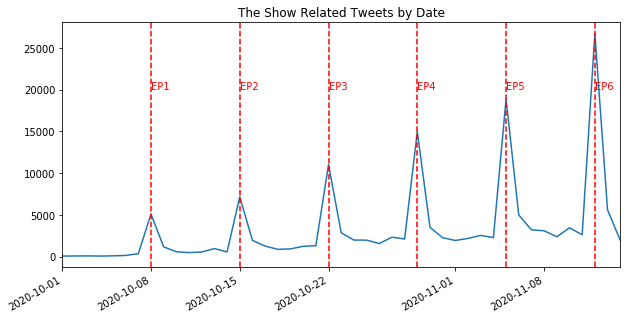

In [69]:
ax = total_tweets['date'].value_counts().plot(figsize=(10,5),title='The Show Related Tweets by Date')

for i in range(len(eps_dates)):
    ax.axvline(eps_dates[i], color='r', linestyle='--')
    ax.text(eps_dates[i],20000,'EP{}'.format(i+1),color='red')

ax.figure.savefig('tweet_eps6.png')

## Tweets by Actions

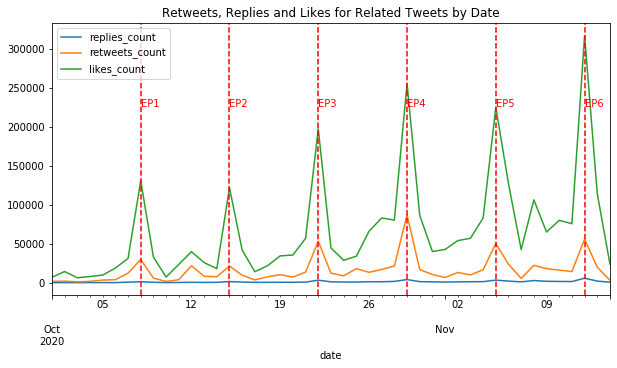

In [71]:
ax = total_tweets.groupby("date").sum()[['replies_count','retweets_count', 'likes_count']].plot(figsize=(10,5),title='Retweets, Replies and Likes for Related Tweets by Date')

for i in range(len(eps_dates)):
    ax.axvline(eps_dates[i], color='r', linestyle='--')
    ax.text(eps_dates[i],225000,'EP{}'.format(i+1),color='red')

ax.figure.savefig('tweets_actions_eps6.jpeg')

## Tweets by unique users

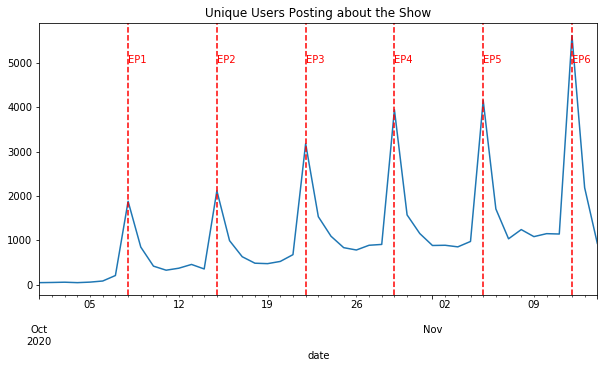

In [159]:
ax = total_tweets.groupby('date')['user_id'].nunique().plot(figsize=(10,5),title='Unique Users Posting about the Show')

for i in range(len(eps_dates)):
    ax.axvline(eps_dates[i], color='r', linestyle='--')
    ax.text(eps_dates[i],5000,'EP{}'.format(i+1),color='red')

ax.figure.savefig('users_eps6.jpeg')

## Tweets by hours

In [120]:
total_tweets['hour']=pd.to_datetime(total_tweets['time']).dt.hour

In [ ]:
air_time = total_tweets[total_tweets['date']==pd.to_datetime('2020-11-12')]

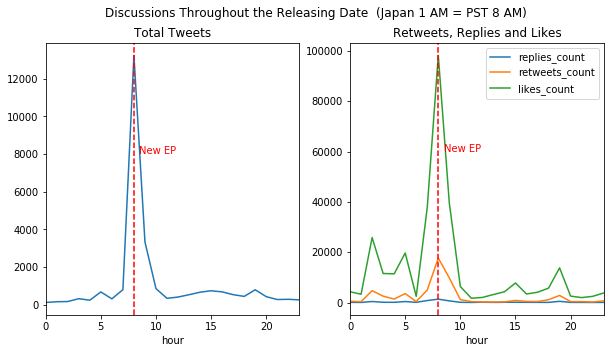

In [155]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots(1,2)

air_time.groupby(['hour']).count()['id'].plot(figsize=(12,12),\
                                              title='Total Tweets',\
                                              ax=axes[0])
axes[0].axvline(8, color='r', linestyle='--')
axes[0].text(8.5,8000,'New EP'.format(i+1),color='red')

air_time.groupby(["hour"]).sum()[['replies_count','retweets_count', 'likes_count']].plot(figsize=(10,5),\
                                                                                         title='Retweets, Replies and Likes',\
                                                                                         ax = axes[1])
axes[1].axvline(8, color='r', linestyle='--')
axes[1].text(8.5,60000,'New EP'.format(i+1),color='red')

figure.suptitle('Discussions Throughout the Releasing Date  (Japan 1 AM = PST 8 AM)')

figure.savefig('hour.png')

## Tweets by languages

In [99]:
def ja(x):
    if x =='ja':
        return 'Japanese'
    else:
        return 'Other'
    
total_tweets['ja']=total_tweets['language'].apply(lambda x: ja(x))

Text(0, 0.5, '')

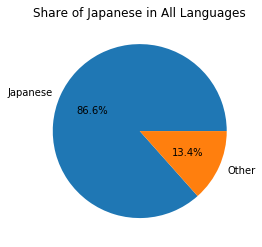

In [102]:
ax = total_tweets['ja'].value_counts().plot.pie(autopct='%1.1f%%',title='Share of Japanese in All Languages')
ax.set_ylabel('')

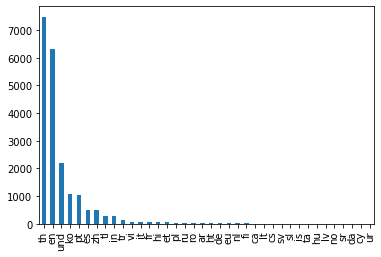

In [74]:
df_lan = total_tweets[total_tweets['language'] != 'ja']
df_lan['language'].value_counts().plot(kind='bar')

In [76]:
lan_list = pd.read_excel('language_code.xlsx')
lan_list.rename(columns={'ISO Code':'language'},inplace=True)
lan_list

,Language,language
0,Abkhazian,ab
1,Afar,aa
2,Afrikaans,af
3,Akan,ak
4,Albanian,sq
...,...,...
186,Xhosa,xh
187,Yiddish,"yi, ji"
188,Yoruba,yo
189,"Zhuang, Chuang",za


In [103]:
lans = df_lan.merge(lan_list, on='language',how='left')

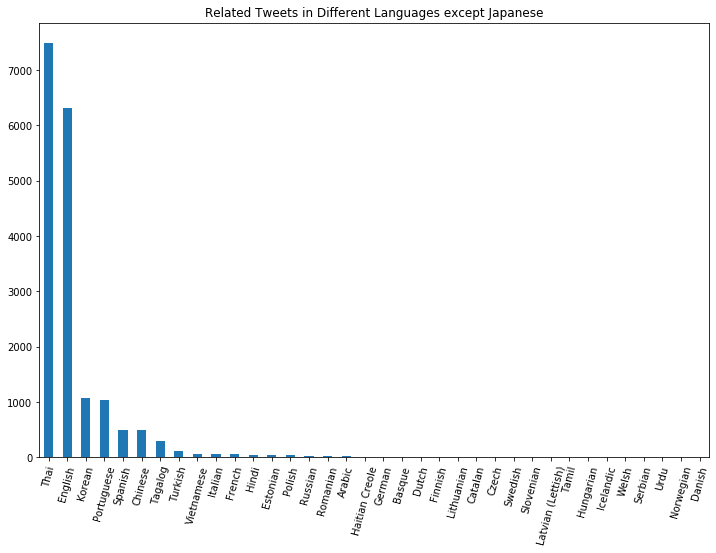

In [80]:
lans['Language'].value_counts().plot(kind='bar',figsize=(12,8),rot=75,title='Related Tweets in Different Languages except Japanese')

In [83]:
lans['Language'].unique()

array(['English', 'Korean', nan, 'Thai', 'Vietnamese', 'Italian',
       'Tagalog', 'Chinese', 'Polish', 'Estonian', 'Haitian Creole',
       'Portuguese', 'Romanian', 'French', 'Spanish', 'Turkish', 'Hindi',
       'Czech', 'Dutch', 'German', 'Slovenian', 'Hungarian', 'Russian',
       'Basque', 'Tamil', 'Welsh', 'Lithuanian', 'Swedish', 'Catalan',
       'Finnish', 'Latvian (Lettish)', 'Icelandic', 'Arabic', 'Norwegian',
       'Serbian', 'Danish', 'Urdu'], dtype=object)

In [104]:
top_six = ['Thai','English', 'Korean','Portuguese','Chinese','Spanish']
def lan_classification(x):
    if x in top_six:
        return x
    else:
        return 'other'

In [105]:
lans['lans_class'] = lans['Language'].apply(lambda x: lan_classification(x))
lans['lans_class'].unique()

array(['English', 'Korean', 'other', 'Thai', 'Chinese', 'Portuguese',
       'Spanish'], dtype=object)

Text(0, 0.5, '')

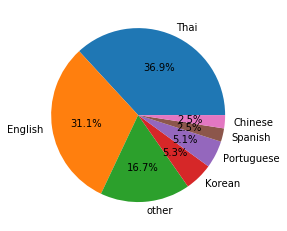

In [106]:
ax = lans['lans_class'].value_counts().plot.pie(autopct='%1.1f%%')
ax.set_ylabel('')

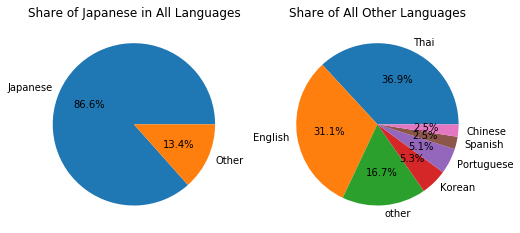

In [113]:
figure, axes = plt.subplots(1, 2)

total_tweets['ja'].value_counts().plot.pie(figsize=(8,8),autopct='%1.1f%%',title='Share of Japanese in All Languages',ax=axes[0])
axes[0].set_ylabel('')
lans['lans_class'].value_counts().plot.pie(figsize=(8,8),autopct='%1.1f%%',title='Share of All Other Languages',ax=axes[1])
axes[1].set_ylabel('')

figure.savefig('lan_share.png')